In [55]:
# https://textbook.nipraxis.org/images_3d.html
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nipraxis

In [56]:
plt.rcParams['image.cmap'] = 'gray' # Set 'gray' as the default colormap
np.set_printoptions(precision=4, suppress=True) # Display array values to 4 digits of precision
path = "C:/Users/tssan/OneDrive/Desktop/EngPsych/scans35/s009_anat.nii"


In [57]:
structural_fname = nipraxis.fetch_file('ds114_sub009_highres.nii')
structural_fname

'C:\\Users\\tssan\\AppData\\Local\\nipraxis\\nipraxis\\Cache\\0.5\\ds114_sub009_highres.nii'

In [58]:
img = nib.load(path)
img

In [59]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 172   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  1.  1.  1.2 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -98.8503
qoffset_y       : 141.562
qoffset_z       : 107.812
srow_x          : [ -0.      -0. 

In [60]:
img.shape
data = img.get_fdata()
data.dtype

dtype('float64')

In [61]:
data_mean = np.mean(data)
data_std = np.std(data)
print(f"The mean intensity of this image is {data_mean}, and the standard deviation is {data_std}.")

The mean intensity of this image is 357.8509320990984, and the standard deviation is 543.2876884988365.


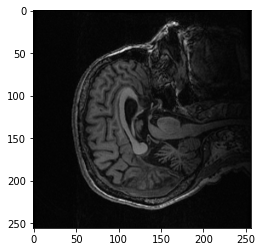

In [62]:
middle_slice = data[:, :, img.shape[-1] // 2 - 1]
plt.imshow(middle_slice)

(array([ 390902., 5259014., 2283766.,  417067.,  235146.,  180854.,
         154344.,  133196.,  118969.,  109019.,  101675.,   95298.,
          92069.,   89632.,   87307.,   85132.,   83226.,   83622.,
          83079.,   81882.,   80493.,   76349.,   71921.,   69504.,
          65865.,   63204.,   60783.,   58414.,   59315.,   58286.,
          55870.,   51868.,   47600.,   42058.,   36829.,   29626.,
          24119.,   19859.,   16269.,   14108.,   11898.,   10120.,
           8597.,    7186.,    5963.,    5410.,    4686.,    4250.,
           4033.,    3751.,    3532.,    3293.,    3044.,    2899.,
           2686.,    2464.,    2323.,    2057.,    1974.,    1798.,
           1589.,    1515.,    1334.,    1221.,    1053.,     963.,
            877.,     791.,     647.,     540.,     458.,     379.,
            306.,     271.,     211.,     163.,     119.,      71.,
             46.,      35.,      31.,      20.,      15.,       5.,
             12.,       2.,       7.,       2., 

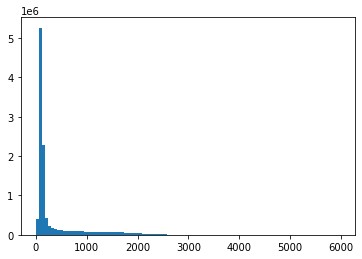

In [63]:
# Show histogram of the values in the 3D image.
plt.hist(np.ravel(data), bins=100)

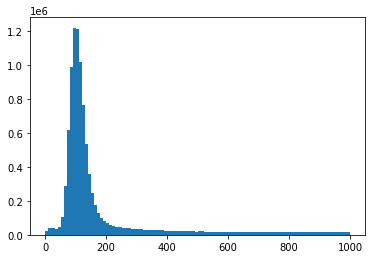

In [64]:
# Show histogram of the values in the 3D image, but selecting only voxels
# with values > 0 and < 1000
is_above_0 = data > 0
is_below_1000 = data < 1000
# Combine the two selections with & (True if both are True).
is_both = is_above_0 & is_below_1000
plt.hist(data[is_both], bins=100);

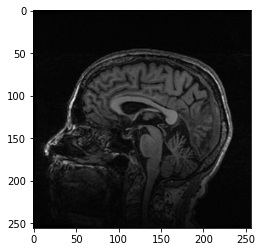

In [65]:
plt.imshow(middle_slice.T)

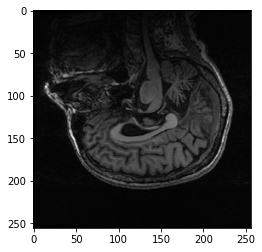

In [66]:
to_display = np.flipud(middle_slice.T)
plt.imshow(to_display)

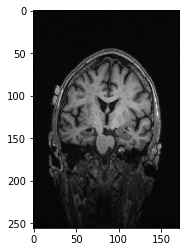

In [67]:
yz_slice = data[img.shape[0] // 2 - 1, :, :]
yz_slice.shape
plt.imshow(yz_slice)

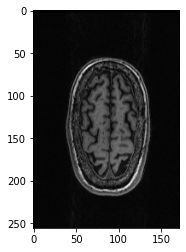

In [68]:
xz_slice = data[:, 78, :]
xz_slice.shape
plt.imshow(xz_slice)

<OrthoSlicer3D: C:/Users/tssan/OneDrive/Desktop/EngPsych/scans35/s009_anat.nii (172, 256, 256)>

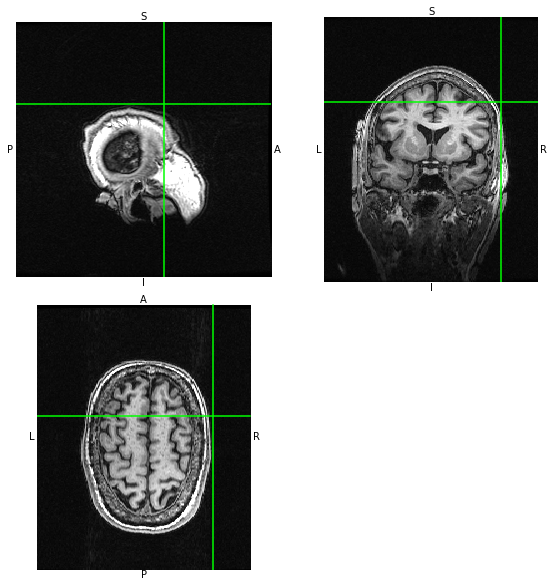

In [69]:
img.orthoview()